In [1]:
%pip install keras
%pip install tensorflow
%pip install --upgrade numpy

from keras.models import Sequential 
from keras.layers import Dense, Dropout, LSTM
from keras.optimizers import RMSprop
import numpy as np
import random
import sys


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
  Using cached numpy-2.1.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.1.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.0
    Uninstalling numpy-2.3.0:
      Successfully uninstalled numpy-2.3.0

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
  Using cached numpy-2.3.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (62 kB)
Using cached numpy-2.3.0-cp312-cp312-manylinux_2_28_x86_64.whl (16.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.3
    Uninstalling numpy-2.1.3:
      Successfully uninstalled numpy-

2025-06-12 22:51:49.724999: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-12 22:51:54.534564: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-12 22:51:56.048300: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749768719.207076    1969 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749768719.856227    1969 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1749768726.921545    1969 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [ ]:
filename = "/content/Trading with Mexico.txt"
raw_text = open(filename, 'r', encoding='utf-8').read()
raw_text = raw_text.lower()
print(raw_text[0:1000])

the project gutenberg ebook of trading with mexico
    
this ebook is for the use of anyone anywhere in the united states and
most other parts of the world at no cost and with almost no restrictions
whatsoever. you may copy it, give it away or re-use it under the terms
of the project gutenberg license included with this ebook or online
at www.gutenberg.org. if you are not located in the united states,
you will have to check the laws of the country where you are located
before using this ebook.

title: trading with mexico

author: wallace thompson

release date: february 26, 2025 [ebook #75469]

language: english

original publication: new york: dodd, mead and company, 1921

credits: the online distributed proofreading team at https://www.pgdp.net (this file was produced from images generously made available by the internet archive)


*** start of the project gutenberg ebook trading with mexico ***





                              trading with
                                 mexico



In [3]:
raw_text = ''.join(c for c in raw_text if not c.isdigit())
chars = sorted(list(set(raw_text)))

char_to_int = dict((c, i) for i, c in enumerate(chars)) 
int_to_char = dict((i, c) for i, c in enumerate(chars))

In [4]:
n_chars = len(raw_text)
n_vocab = len(chars)
print("Total Charaters in the text; corpus length: ", n_chars)
print("Total Vocab: ", n_vocab)

Total Charaters in the text; corpus length:  387019
Total Vocab:  63


In [5]:
seq_length = 60
step = 10
sentences = []
next_chars = []

for i in range(0, n_chars - seq_length, step):
    sentences.append(raw_text[i: i + seq_length])
    next_chars.append(raw_text[i + seq_length])

n_patterns = len(sentences)
print('Number of sequences:', n_patterns)

Number of sequences: 38696


In [6]:
x = np.zeros((len(sentences), seq_length, n_vocab), dtype=np.bool_)
y = np.zeros((len(sentences), n_vocab), dtype=np.bool_)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_to_int[char]] = 1
    y[i, char_to_int[next_chars[i]]] = 1

print(x.shape)
print(y.shape)
print(y[0:10])

(38696, 60, 63)
(38696, 63)
[[False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False  True False False False False False False False False False
  False False False False False False False False False False False False
  False False False]
 [False  True False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False Fals

In [7]:
model = Sequential()
model.add(LSTM(128, input_shape=(seq_length, n_vocab)))
model.add(Dense(n_vocab, activation='softmax'))

optimizer = RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)
model.summary()

2025-06-12 22:52:30.302169: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │        98,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 63)             │         8,127 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 106,431 (415.75 KB)

 Trainable params: 106,431 (415.75 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
from keras.callbacks import ModelCheckpoint 

filepath = "saved_weights-{epoch:02d}-{loss:.4f}.keras"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

history = model.fit(x, y, 
                    batch_size=128,
                    epochs=50,
                    callbacks=callbacks_list)
model.save('my_saved_weights_50epochs.keras')

Epoch 1/50


2025-06-12 22:52:31.893706: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 146270880 exceeds 10% of free system memory.


303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 2.8013
Epoch 1: loss improved from inf to 2.52303, saving model to saved_weights-01-2.5230.keras
303/303 ━━━━━━━━━━━━━━━━━━━━ 46s 143ms/step - loss: 2.8004
Epoch 2/50
302/303 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 2.2363
Epoch 2: loss improved from 2.52303 to 2.18341, saving model to saved_weights-02-2.1834.keras
303/303 ━━━━━━━━━━━━━━━━━━━━ 37s 120ms/step - loss: 2.2359
Epoch 3/50
302/303 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 1.9317
Epoch 3: loss improved from 2.18341 to 1.90648, saving model to saved_weights-03-1.9065.keras
303/303 ━━━━━━━━━━━━━━━━━━━━ 29s 95ms/step - loss: 1.9315
Epoch 4/50
302/303 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 1.7810
Epoch 4: loss improved from 1.90648 to 1.76712, saving model to saved_weights-04-1.7671.keras
303/303 ━━━━━━━━━━━━━━━━━━━━ 41s 94ms/step - loss: 1.7809
Epoch 5/50
302/303 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 1.6440
Epoch 5: loss improved from 1.76712 to 1.65484, saving model to

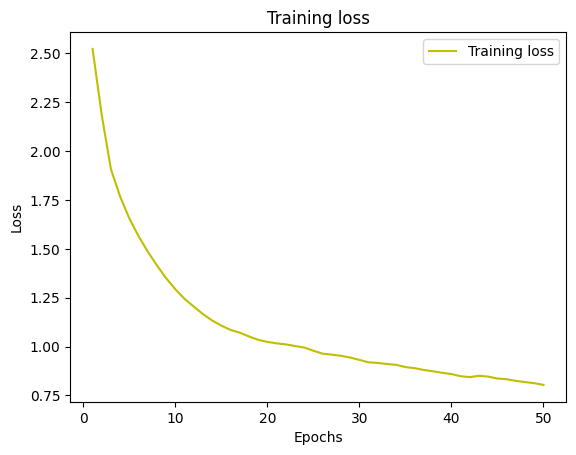

In [9]:
from matplotlib import pyplot as plt

# plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
def sample(preds):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)  # exp of log(x), isn't this same as x??
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [ ]:
# Prediction
# load the network weights
filename = "/my_saved_weights_50epochs.keras"
model.load_weights(filename)

# Pick a random sentence from the text as seed.
start_index = random.randint(0, n_chars - seq_length - 1)

# Initiate generated text and keep adding new predictions and print them out
generated = ''
sentence = raw_text[start_index: start_index + seq_length]
generated += sentence

print('------ Seed for our text prediction: "' + sentence + '"')
sys.stdout.write(generated)

------ Seed for our text prediction: "ecurity the mexican
government’s pledge of a portion of the "
ecurity the mexican
government’s pledge of a portion of the 

60

In [14]:
for i in range(400):  # Number of characters including spaces
    x_pred = np.zeros((1, seq_length, n_vocab))
    for t, char in enumerate(sentence):
        x_pred[0, t, char_to_int[char]] = 1.

    preds = model.predict(x_pred, verbose=0)[0]
    next_index = sample(preds)
    next_char = int_to_char[next_index]

    generated += next_char
    sentence = sentence[1:] + next_char

    sys.stdout.write(next_char)
    sys.stdout.flush()

print()

great madueme in ap yout in a cruszal many and to the “oil from personal sums. the precation of the marget and of labor, shipp pucc, provisorgect of ravine that proboblectity esoorgat we great of eupshall agricut
lifence in its ever bone ffield nearly engour on vistrance barkerd. for which is sistern and excractive in the huscussing of ducation wersk and pater, with
with with its sife bur to-day d
